## Data

In [59]:
from notebooks.text_processing import generate_corpus_df, add_sectarian_label, convert_df_to_by_book, pre_process_corpus
import pandas as pd
import numpy as np
from notebooks.utils import generate_composition_to_book
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
from nltk.corpus import stopwords
from notebooks.text_processing import pre_process_corpus

matplotlib.rcParams['figure.figsize'] = (20, 10)

from tqdm import tqdm

In [60]:
df = generate_corpus_df()
df = add_sectarian_label(df)

**Locating corpus resources ...**

Name,# of nodes,# slots / node,% coverage
scroll,1001,1428.81,100
lex,10450,129.14,94
fragment,11182,127.91,100
line,52895,27.04,100
clause,125,12.85,0
cluster,101099,6.68,47
phrase,315,5.10,0
word,500995,2.81,99
sign,1430241,1.00,100


100%|██████████| 52895/52895 [00:05<00:00, 9682.74it/s] 
[05-02 14:57:54] {/Users/yonatanlou/dev/QumranNLP/notebooks/text_processing.py:78} INFO - Generated 997 unique books
/Users/yonatanlou/dev/QumranNLP/notebooks/utils.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["book_pasuk"] = df_filtered["book"] + " " + df_filtered["pasuk"]
[05-02 14:57:54] {/Users/yonatanlou/dev/QumranNLP/notebooks/text_processing.py:80} INFO - Removed 387 books that are smaller than 100 words per book


In [61]:
null_lines = (df["text"].isna())
print(f"remove {(null_lines.sum())} null lines")
df = df[~null_lines]
df_by_book = convert_df_to_by_book(df)
composition_to_book = generate_composition_to_book()
df_by_book_by_comp =pd.merge(df_by_book, composition_to_book, on="book", how="inner")

remove 16 null lines


## Pre processing

### Detailed Workflow
The function pre_process_corupus steps:

**Step 1: Document Level Preprocessing**
Each document is initially processed to:
Remove specific characters (like slashes) that might not be relevant for analysis.
Normalize spaces to ensure consistent spacing between words.

**Step 2: Word Level Processing**
For each word in a document:
Stop Word Removal: Optional removal of stop words to reduce dimensionality and focus on meaningful words.
Final Letter Replacement: The raw data is without the final letter (like ף), im adding those final letters.
Non-Hebrew Character Filtering: Removes characters that are not part of a defined set of allowed Hebrew characters. 

In [62]:

nltk.download('stopwords')
stop_words = set(stopwords.words('hebrew'))
all_docs = pre_process_corpus(df_by_book, stop_words, remove_stop_words=True)

def remove_single_letter_words(text):
    words = text.split(" ")  # Split the text into individual words
    filtered_words = [word for word in words if len(word) > 1]  # Keep words that are more than one letter
    return ' '.join(filtered_words)
for i in range(len(all_docs)):
    d_new = remove_single_letter_words(all_docs[i].replace(".", ""))
    all_docs[i] = d_new

    
df_by_book["processed_text"] = all_docs

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yonatanlou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
195it [00:00, 648.44it/s]

(56) replaced 1 words in 1QM (0.000 from all words). chars removed: {'־'}
(79) replaced 42 words in 3Q15 (0.049 from all words). chars removed: {'Δ', 'Ε', 'Ν', 'ֽ', 'Η', 'ׄ', 'Α', 'Σ', 'Θ', 'Τ', 'Κ', 'Χ', 'Γ', 'ׅ', '֜', 'Ι', 'Ρ'}
(201) replaced 1 words in 4Q249e (0.011 from all words). chars removed: {'֜'}


426it [00:00, 902.20it/s]

(259) replaced 4 words in 4Q317 (0.004 from all words). chars removed: {'֜'}
(260) replaced 104 words in 4Q318 (0.571 from all words). chars removed: {'ׄ', 'ׅ', '֜'}
(261) replaced 35 words in 4Q319 (0.040 from all words). chars removed: {'ׅ', 'ׄ', 'ֽ', '֜'}
(263) replaced 136 words in 4Q320 (0.260 from all words). chars removed: {'ׄ', 'ׅ', '֜'}
(279) replaced 1 words in 4Q345 (0.029 from all words). chars removed: {'֜'}
(280) replaced 3 words in 4Q348 (0.048 from all words). chars removed: {'֜'}
(283) replaced 1 words in 4Q360a (0.029 from all words). chars removed: {'֜', 'ׄ', 'ׅ'}
(411) replaced 1 words in 4Q498 (0.017 from all words). chars removed: {'֜'}
(418) replaced 1 words in 4Q503 (0.001 from all words). chars removed: {'֜'}
(428) replaced 2 words in 4Q512 (0.002 from all words). chars removed: {'֜'}
(464) replaced 5 words in 4Q550 (0.009 from all words). chars removed: {'+'}
(465) replaced 2 words in 4Q551 (0.034 from all words). chars removed: {'+'}
(466) replaced 2 words in

613it [00:00, 831.52it/s]


(549) replaced 6 words in 6Q26 (0.162 from all words). chars removed: {'֜'}


Here is an example for a certain book before and after (11Q1):
Before:

In [20]:
df_by_book["text"][0]

' וסמכ ידו על ראש השעיר ושחט אתו ╱  במקומ אשר ישחט את העלה לפני יהוה חטאת הוא . ולקח הכהנ מדמ ╱  החטאת באצבעו ונתנ על קרנת מזבח ושחט את העלה ושפכ אל יסוד מזבח העלה . ואת ╱  כל חלבו יקטיר המזבחה   יהוה וכפר עליו הכהנ ╱ .  ואל אלצפנ בני עזיאל דד אהרנ ויאמר אלהמ קרבו שאו את אחיכמ מאת ╱  פני הקדש אל מחוצ למחנה . ויקרבו וישאמ בכתנתמ אל מחוצ למחנה ╱  כאשר דבר משה . ויאמר משה אל אהרנ ולאלעזר ולאיתמר בניו ראשיכמ ╱  אל תפרעו ובגדיכמ לא תפרמו ולא תמתו ועל כל העדה יקצפ ואחיכמ ╱  כל בית ישראל יבכו את השרפה אשר שרפ יהוה . ופתח אהל מועד לא ╱ .   וכל הולכ על גחוניו בכל החיה ההלכת על ╱  ארבע טמאימ המ לכמ כל הנגע בנבלתמ יטמא עד הערב . והנשא ╱  את נבלתמ יכבס בגדיו וטמא עד הערב טמאימ המה לכמ . וזה לכמ ╱  הטמא בשרצ השרצ על הארצ החלד והעכבר והצב למינהו . ╱  והאנקה והכח והלטאה והחמט והתנשמת . אלה הטמאימ לכמ ╱  בכל השרצ כל הנגע בהמ במותמ יטמא עד הערב . וכל אשר ╱  יפל עליו מהמ במתמ יטמא מכל כלי עצ או בגד או עור או שק ╱  כל כלי אשר יעשה מלאכה בהמ במימ יובא וטמא עד הערב וטהר . ╱  צרעת הוא וראהו הכהנ וטמא אתו . 

After:

In [21]:
df_by_book["processed_text"][0]

'וסמך ידו ראש השעיר ושחט אתו במקום ישחט העלה יהוה חטאת ולקח הכהן מדם החטאת באצבעו ונתן קרנת מזבח ושחט העלה ושפך יסוד מזבח העלה חלבו יקטיר המזבחה יהוה וכפר הכהן ואל אלצפן בני עזיאל דד אהרן ויאמר אלהם קרבו שאו אחיכם מאת פני הקדש מחוץ למחנה ויקרבו וישאם בכתנתם מחוץ למחנה דבר משה ויאמר משה אהרן ולאלעזר ולאיתמר בניו ראשיכם תפרעו ובגדיכם תפרמו ולא תמתו ועל העדה יקצף ואחיכם בית ישראל יבכו השרפה שרף יהוה ופתח אהל מועד וכל הולך גחוניו בכל החיה ההלכת ארבע טמאים הם לכם הנגע בנבלתם יטמא הערב והנשא נבלתם יכבס בגדיו וטמא הערב טמאים המה לכם וזה לכם הטמא בשרץ השרץ הארץ החלד והעכבר והצב למינהו והאנקה והכח והלטאה והחמט והתנשמת הטמאים לכם בכל השרץ הנגע בהם במותם יטמא הערב וכל יפל מהם במתם יטמא מכל כלי עץ בגד עור שק כלי יעשה מלאכה בהם במים יובא וטמא הערב וטהר צרעת וראהו הכהן וטמא אתו ואם בהרת לבנה בעור בשרו ועמק אין מראיה מן העור ושערה הפך לבן והסגיר הכהן הנגע שבעת ימים וראהו הכהן ביום השביעי והנה הנגע עמד בעיניו פשה הנגע בעור והסגירו הכה שבעת ימים שנית וראה הכהן אתו ביום השביעי שנית והנה כהה הנגע ול פשה 

In [31]:
from transformers import AutoModel, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('dicta-il/dictabert-lex')
model = AutoModel.from_pretrained('dicta-il/dictabert-lex', trust_remote_code=True)

model.eval()


corpus = df_by_book["processed_text"].to_list()


A new version of the following files was downloaded from https://huggingface.co/dicta-il/dictabert-lex:
- BertForLexPrediction.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


In [37]:
vocab_before_lemmatization = set()
for doc in corpus:
    for word in doc.split(" "):
        vocab_before_lemmatization.add(word)
print(len(vocab_before_lemmatization))

41817


In [38]:
from tqdm.notebook import tqdm
replace_words_counter = 0
lemmatized_corpus = []
for i, doc in tqdm(enumerate(corpus)):
  print(i,end=',')
  new_doc = []
  new_doc_words = model.predict(doc, tokenizer)[0]  
  for word in new_doc_words:
    if word[1] == "[BLANK]":
      new_doc.append(word[0])
      continue
    if "שחט" in word[0]:
      new_doc.append(word[0])
      continue
    else:
      new_doc.append(word[1])
      replace_words_counter += 1
  lemmatized_corpus.append(" ".join(new_doc))


/var/folders/yv/8bscwg3x6m5934xb_mry4d_m0000gr/T/ipykernel_15128/2292556423.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, doc in tqdm_notebook(enumerate(corpus)):


0it [00:00, ?it/s]

0123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899100101102103104105106107108109110111112113114115116117118119120121122123124125126127128129130131132133134135136137138139140141142143144145146147148149150151152153154155156157158159160161162163164165166167168169170171172173174175176177178179180181182183184185186187188189190191192193194195196197198199200201202203204205206207208209210211212213214215216217218219220221222223224225226227228229230231232233234235236237238239240241242243244245246247248249250251252253254255256257258259260261262263264265266267268269270271272273274275276277278279280281282283284285286287288289290291292293294295296297298299300301302303304305306307308309310311312313314315316317318319320321322323324325326327328329330331332333334335336337338339340341342343344345346347348349350351352353354355356357358359360361362363364365366367368369

In [46]:
vocab_after_lemmatization = set()
for doc in lemmatized_corpus:
    for word in doc.split(" "):
        vocab_after_lemmatization.add(word)
lemmatized_words_len = len(vocab_before_lemmatization)-len(vocab_after_lemmatization)
print(f"lemmatized {lemmatized_words_len} words ({lemmatized_words_len/len(vocab_before_lemmatization):.2%})")

lemmatized 28076 words (67.14%)


In [48]:
df_by_book["lemmatized_text"] =  lemmatized_corpus
df_by_book.info()

<class 'pandas.core.frame.DataFrame'>
Index: 613 entries, 0 to 50551
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   book             613 non-null    object 
 1   text             613 non-null    object 
 2   label            613 non-null    object 
 3   section          84 non-null     object 
 4   processed_text   613 non-null    object 
 5   number_of_chars  613 non-null    int64  
 6   number_of_words  613 non-null    int64  
 7   avg_word_length  613 non-null    float64
 8   lemmatized_text  613 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 64.1+ KB


## Analysis

In [51]:
df_by_book["number_of_chars"] = df_by_book['processed_text'].str.len()
df_by_book["number_of_words"] = df_by_book['processed_text'].str.split().map(lambda x: len(x))
df_by_book["avg_word_length"] = df_by_book['processed_text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))

df_by_book["number_of_chars_lem"] = df_by_book['lemmatized_text'].str.len()
df_by_book["number_of_words_lem"] = df_by_book['lemmatized_text'].str.split().map(lambda x: len(x))
df_by_book["avg_word_length_lem"] = df_by_book['lemmatized_text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))

Books with the highest number of characters:

In [52]:
df_by_book.sort_values(by="number_of_chars",ascending=False)[["book", "number_of_chars"]].head(15)

,book,number_of_chars
7634,1Qisaa,81450
1238,11Q19,40654
36772,4Q51,39461
5888,1QHa,35881
5323,1Q8,27353
15623,4Q22,25079
48472,Mur88,24904
6821,1QM,20777
19710,4Q27,20768
2790,11Q5,19583


In [57]:
df_by_book[df_by_book["book"]=="1Qisaa"]["processed_text"].to_list()

['חזון ישעיהו בן אמוץ חזה יהודה וירושלם ביומי עוזיה יותם אחז יחזקיה מלכי יהודה שמעו שמים והאזיני הארץ כיא יהוה דבר בנים גדלתי ורוממתי והמה פשעו בי ידע שור קוניהו וחמור אבוס בעליו ישראל לוא ידע ועמי לוא התבונן הוי גוי חוטה עם כבד עוון זרע מרעים בנים משחיתים עזבו יהוה נאצו קדוש ישראל נזרו אחור תכו עוד תוסיפו סרה כול ראוש לחולי וכול לבב דוה מכף רגל ועד רואש בו מתם פצע וחבורה ומכה טריה לוא זרו ולוא חובשו ולוא רככה בשםן ארצכם שממה עריכם שרופות אש אדמתכם לנגדכם זרים אוכלים ושממו כמאפכת זרים ונתרת בת ציון כסוכה בכרם וכמלונה במקשה כעיר נצורה לולי יהוה צבאות הותיר שריד כמעט כסודם היינו לעומרה דמינו שמעו דבר יהוה קציני סודם ואזינו תורת אלוהינו עם עומרה רוב זבחיכם יואמר יהוה שבעתי עולות אילים וחלב מריאים ודם פרים וכבשים ועתודים לוא חפצתי כיא תבאו לראות פני בקש זואת מידכם לרמוס חצרי לוא תוסיפו להביא מנחת שוא קטרת תועבה חודש ושבת קרא מקרא לוא אוכל און ועצרתה חודשיכם ומועדיכם שנאה נפשי היו לטרח נלאיתי נשוא ובפרשכם כפיכם אעלים עיני מכם גם הרבו תפלה אינני שומע ידיכמה דמים מלאו אצבעותיכם בעאון רחצו והז

In [58]:
df_by_book[df_by_book["book"]=="1Qisaa"]["lemmatized_text"].to_list()

['חזון ישעיהו בן אמוץ חזה יהודה ירושלים יום עוז יותם אחז יחזקיה מלך יהודה שמע שמיים האזין ארץ לוא יהוה דבר בן גידל ורוממתי הוא פשע בי ידע שור קונה חמור אבוס בעל ישראל לוא ידע עם לוא התבונן הוי גוי חוט עם כבד עוון זרע מרעים בן השחית שנא יהוה שנא קדוש ישראל נזר אחור תכו עוד הוסיף סר כול ראוש לחולי כול לבב דוה כף רגל עד רואש בו מת פצע חבורה מכה טרי לוא זרו לוא חובש לוא רככה שם ארץ שממה עיר שרוף אש אדמה נגד זר אוכל שם כמאפכת זר ריבית בת ציון כסוכה כרם וכמלונה מקשה עיר נצור לול יהוה צבא הותיר שריד כמעט קודם היינו עומר דם שמע דבר יהוה קצין סוד שמוע תורה אלוהים עם עומרה רוב זבח נאמר יהוה שבעת עולה איל חלב מריאים דם פר כבש ועתודים לוא חפץ כי בא ראה פנים ביקש זואת מיד לרמוס חצר לוא הוסיף הביא מנחה שוא קטרת תועבה חודש שבת קרא מקרא לוא אוכל אוון עצרה חודש מועד שנאה נפש היו עול נלאה נשוא יציר כף העלים עין מן גם הרבה תפילה אין שומע ידיכמה דם מילא אצבע בעאון רחצו והזכו הסיר רוע מעלל נגד עין חדלו הרע לימד היטיב דרוש משפט אשר חמוץ שפט יאתום שנא אלמנה הוליך נא נוכח יואמר יהוה אם היי חטא שנה שלג ילבינו 

In [53]:
df_by_book.sort_values(by="number_of_chars_lem",ascending=False)[["book", "number_of_chars_lem"]].head(15)

,book,number_of_chars_lem
34663,4Q503,2121
14232,4Q2,2096
866,11Q17,2052
22935,4Q321a,2033
22505,4Q319,2026
28142,4Q405,2022
27953,4Q403,2008
22878,4Q321,2001
39337,4Q52,1985
15623,4Q22,1983


Books with the highest avg word length:

In [24]:
df_by_book.sort_values(by="avg_word_length",ascending=False)[["book", "avg_word_length"]].head(15)


,book,avg_word_length
22474,4Q318,5.946108
33167,4Q493,5.265306
23329,4Q334,4.973684
22749,4Q320,4.906921
39655,4Q523,4.875000
9878,2Q7,4.866667
22935,4Q321a,4.864971
22878,4Q321,4.847656
45748,4Q89,4.830189
40803,4Q542,4.819672


In [25]:
df_by_book[df_by_book["book"]=="4Q318"]["processed_text"].to_list()

['ביאאא וביאאאא ביאאאאאאאאא ובך ובךא בךאאאאאאא ובךאאאאאאאא בתולתא בךאאאאאאאאא ובךי מוזניא תשרי בא ובאא עקרבא באאא ובאאאא קשתא ובאאאאא ובאאאאאא ובאאאאאאא גדיא באאאאאאאא וביאאא וביאאאא סרטנא ביאאאאא וביאאאאאא אריא ביאאאאאאא וביאאאאאאאא בתולתא ביאאאאאאאאא ובך ובךא מוזניא בךאא ובךאאא עקרבא בךאאאא ובךאאאאא קשתא בךאאאאאא ובךאאאאאאא ובךאאאאאאאא גדיא בךאאאאאאאאא ובךי דולא שבט בא ובאא נוניא באאא ובאאאא דכרא באאאאא ובאאאאאא ובאאאאאאא תורא באאאאאאאא ובאאאאאאאאא תאומיא בי וביא סרטנא ביאא וביאאא וביאאאא אריא ביאאאאא וביאאאאאא בתולתא ביאאאאאאא וביאאאאאאאא מוזניא ביאאאאאאאאא בך ובךא עקרבא בךאא ובךאאא קשתא בךאאאא ובךאאאאא גדיא בךאאאאאא בךאאאאאאא ובךאאאאאאאא דולא בךאאאאאאאאא ובךי נוניא אדר בא ובאא דכרא באאא ובאאאא תורא באאאאא ובאאאאאא ובאאאאאאא תאומיא באאאאאאאא באאאאאאאאא סרטנא בי וביא אריא ביאא וביאאא וביאאאא בתולתא ביאאאאא וביאאאאאא מוזניא ביאאאאאאא ביאאאאאאאא עקרבא ביאאאאאאאאא ובך ובךאקשתא בךאא ובךאאא גדיא בךאאאא ובךאאאאא דולא בךאאאאאא ובךאאאאאאא ובךאאאאאאאא נוניא בךאאאאאאאאא ובךי דכרא בתורא ירעם מס

some of abbegg parsing is pretty currputed...

Text(0.5, 1.0, 'Average word length')

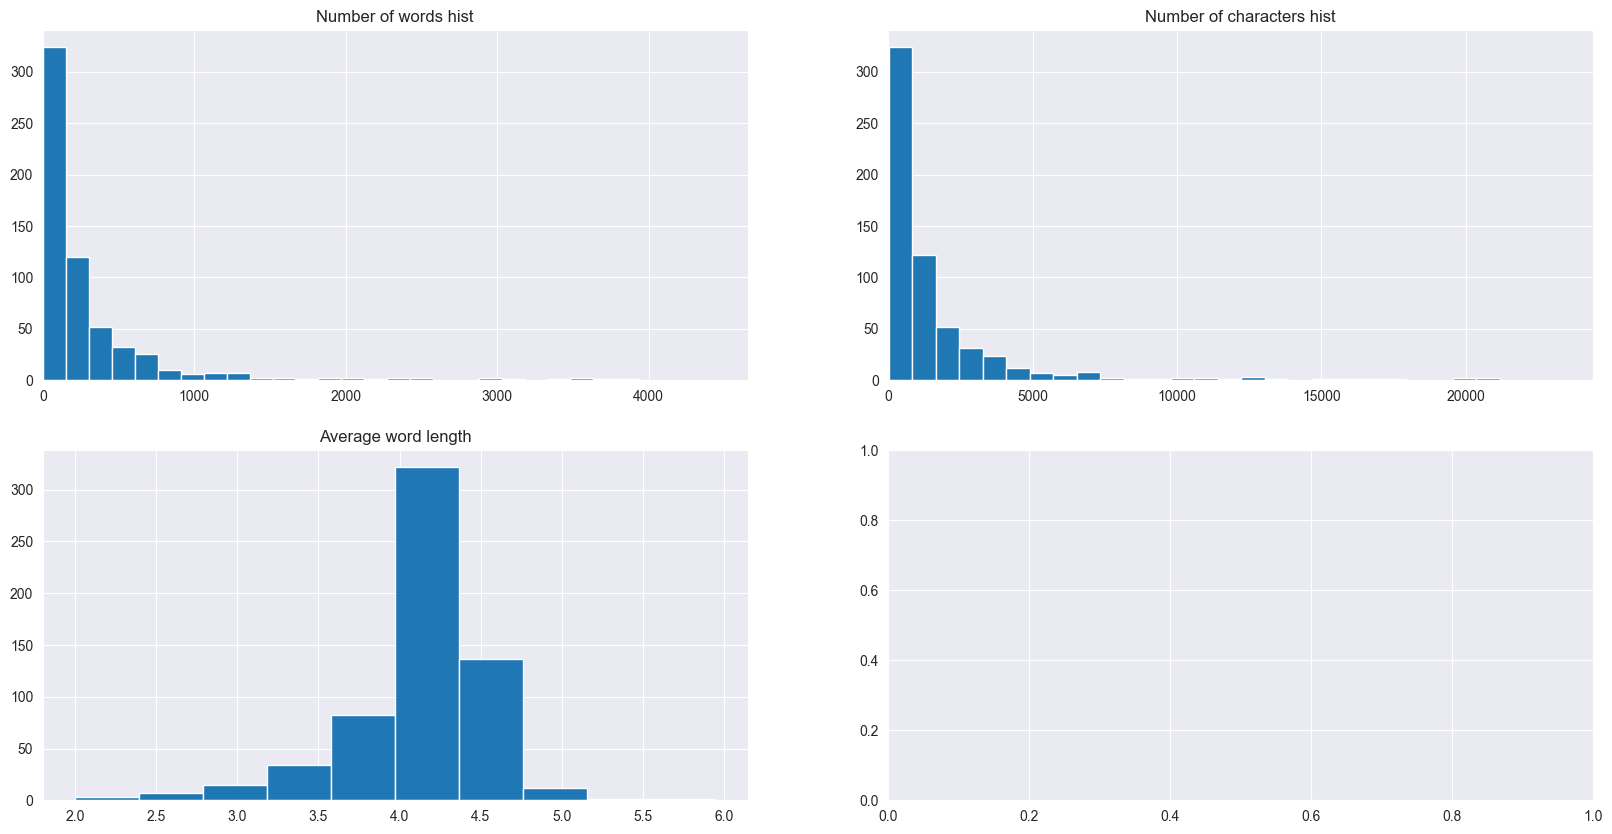

In [26]:
fig, ax = plt.subplots(2,2)
df_by_book["number_of_words"].hist(ax=ax[0,0], bins=100)
df_by_book["number_of_chars"].hist(ax=ax[0,1], bins=100)
ax[0,0].set_xlim(0,df_by_book["number_of_words"].quantile(0.99))
ax[0,1].set_xlim(0,df_by_book["number_of_chars"].quantile(0.99))
df_by_book["avg_word_length"].hist(ax=ax[1,0])
ax[0,0].set_title("Number of words hist")
ax[0,1].set_title("Number of characters hist")
ax[1,0].set_title("Average word length")


Text(0.5, 1.0, 'Top 20 stop words in corpus')

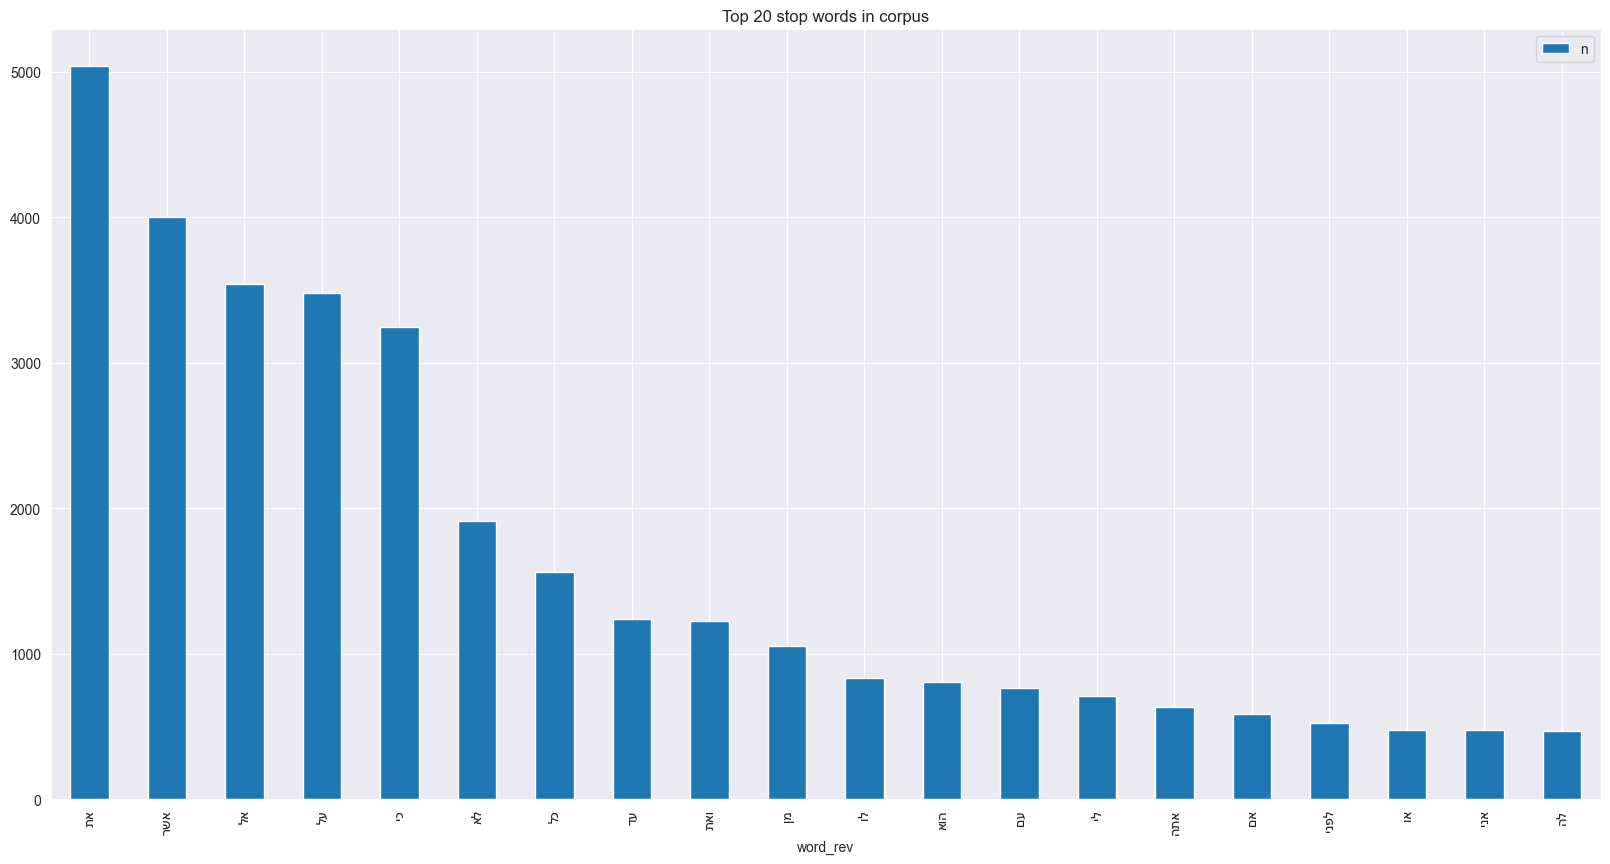

In [27]:
from collections import defaultdict
corpus=[]
words= df_by_book["text"].str.split()
words=words.values.tolist()
corpus=[word for i in words for word in i]


dic=defaultdict(int)
for word in corpus:
    if word in stop_words:
        dic[word]+=1
stop_words_dist = pd.DataFrame([dic]).T.reset_index().rename(columns={0:"n", "index":"word"})
stop_words_dist["word_rev"] =stop_words_dist["word"].str[::-1]
stop_words_dist = stop_words_dist.set_index("word_rev")
stop_words_dist.sort_values(by="n", ascending=False).head(20).plot(kind="bar")
plt.title("Top 20 stop words in corpus")

<Axes: >

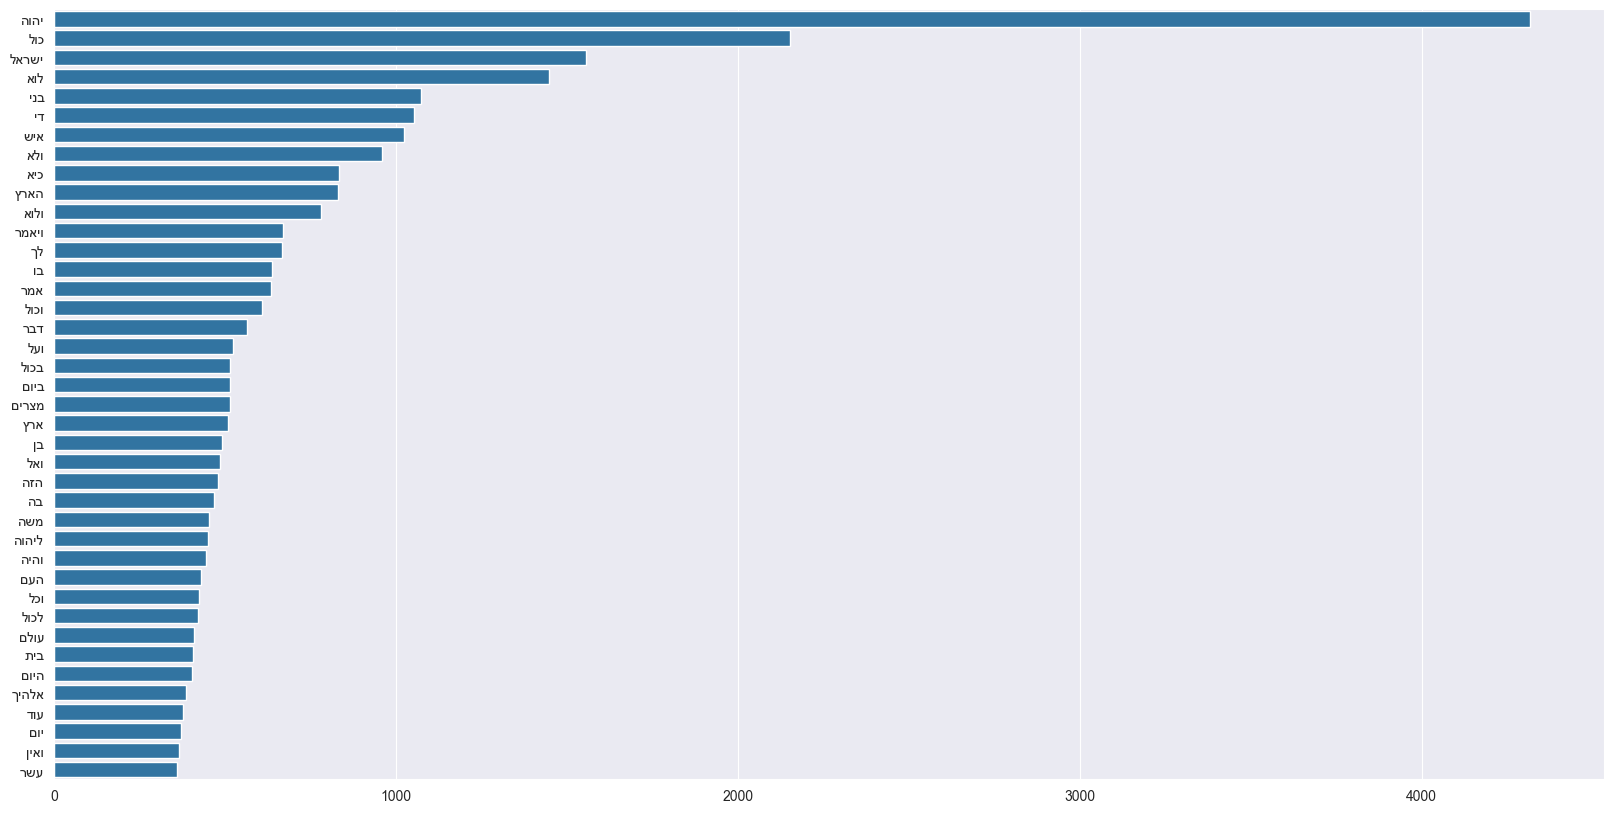

In [28]:
from collections import Counter
corpus=[]
words= df_by_book["processed_text"].str.split()
words=words.values.tolist()
corpus=[word for i in words for word in i]
corpus_no_punc = [word for word in corpus if word != "."]
counter=Counter(corpus_no_punc)
most=counter.most_common()

import seaborn as sns
x, y= [], []
for word,count in most[:40]:
    if (word not in stop_words):
        x.append(word[::-1])
        y.append(count)

sns.barplot(x=y,y=x)

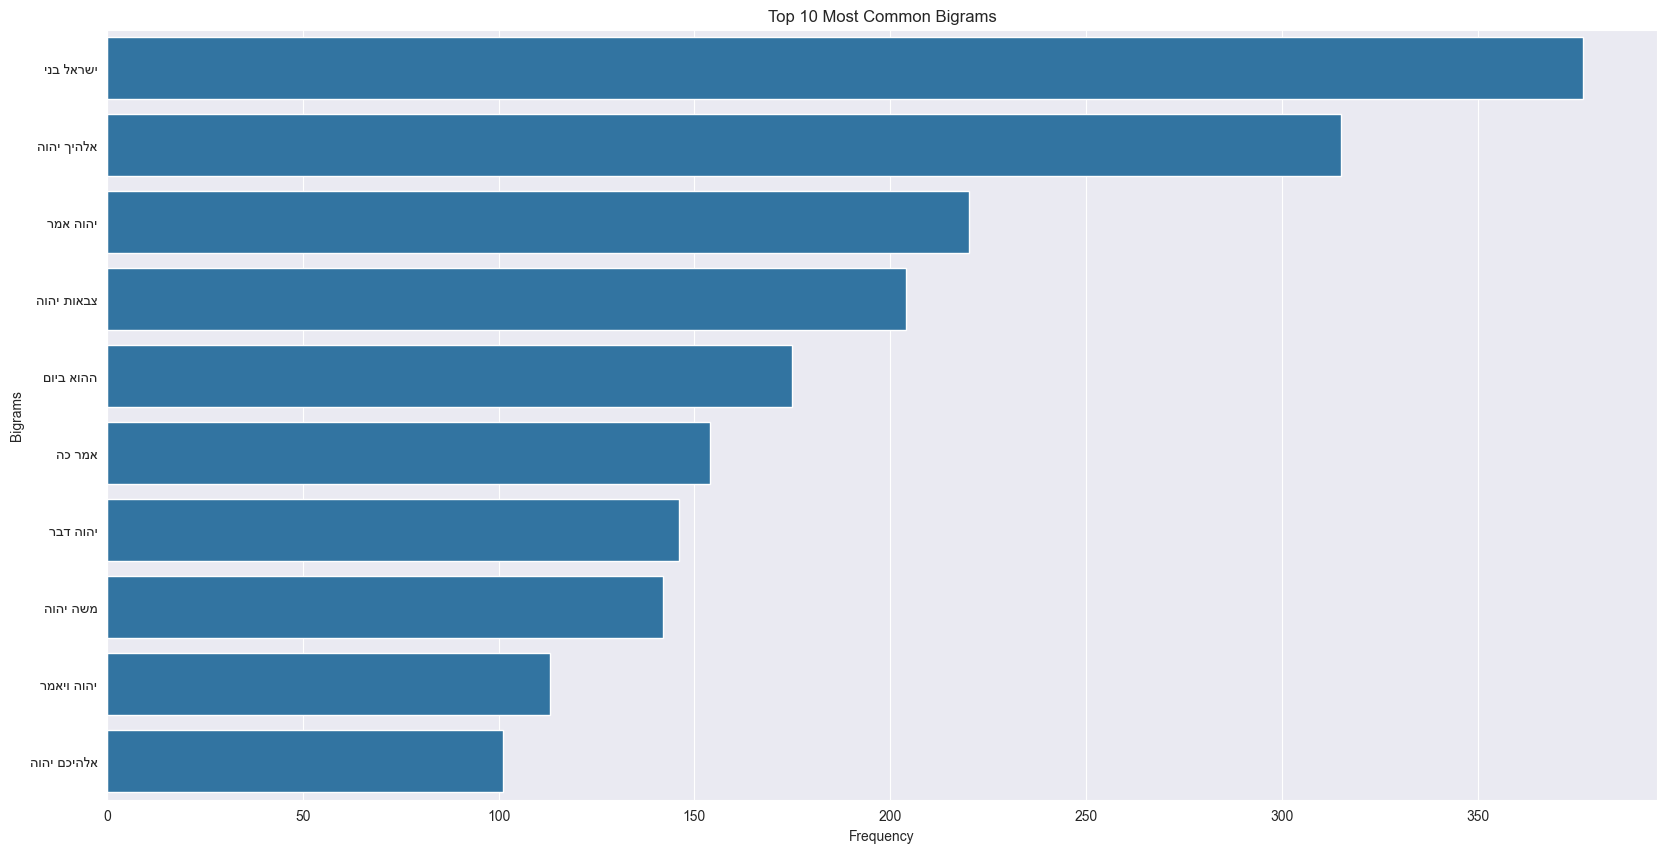

In [29]:
from nltk.util import ngrams
from collections import Counter

def most_common_ngram(words, n=2):
    # Tokenize the corpus into words
    
    # Generate n-grams
    n_grams = ngrams(words, n)
    
    # Count and find the most common n-gram
    ngram_freq = Counter(n_grams)
    most_common = ngram_freq.most_common()  # Returns the most common n-gram and its frequency
    return most_common


corpus_no_punc_rev = [word[::-1] for word in corpus if word != "."]
def plot_ngram(words, k,n):
    top_n_bigrams=most_common_ngram(words,k)[:n]
    bigrams, counts = map(list, zip(*top_n_bigrams))
    bigrams = [' '.join(bigram) for bigram in bigrams]  # Convert tuple to string for better readability on plot
    
    sns.barplot(x=counts, y=bigrams)
    plt.xlabel('Frequency')
    plt.ylabel('Bigrams')
    plt.title('Top 10 Most Common Bigrams')
    plt.show()
plot_ngram(corpus_no_punc_rev,2, 10)


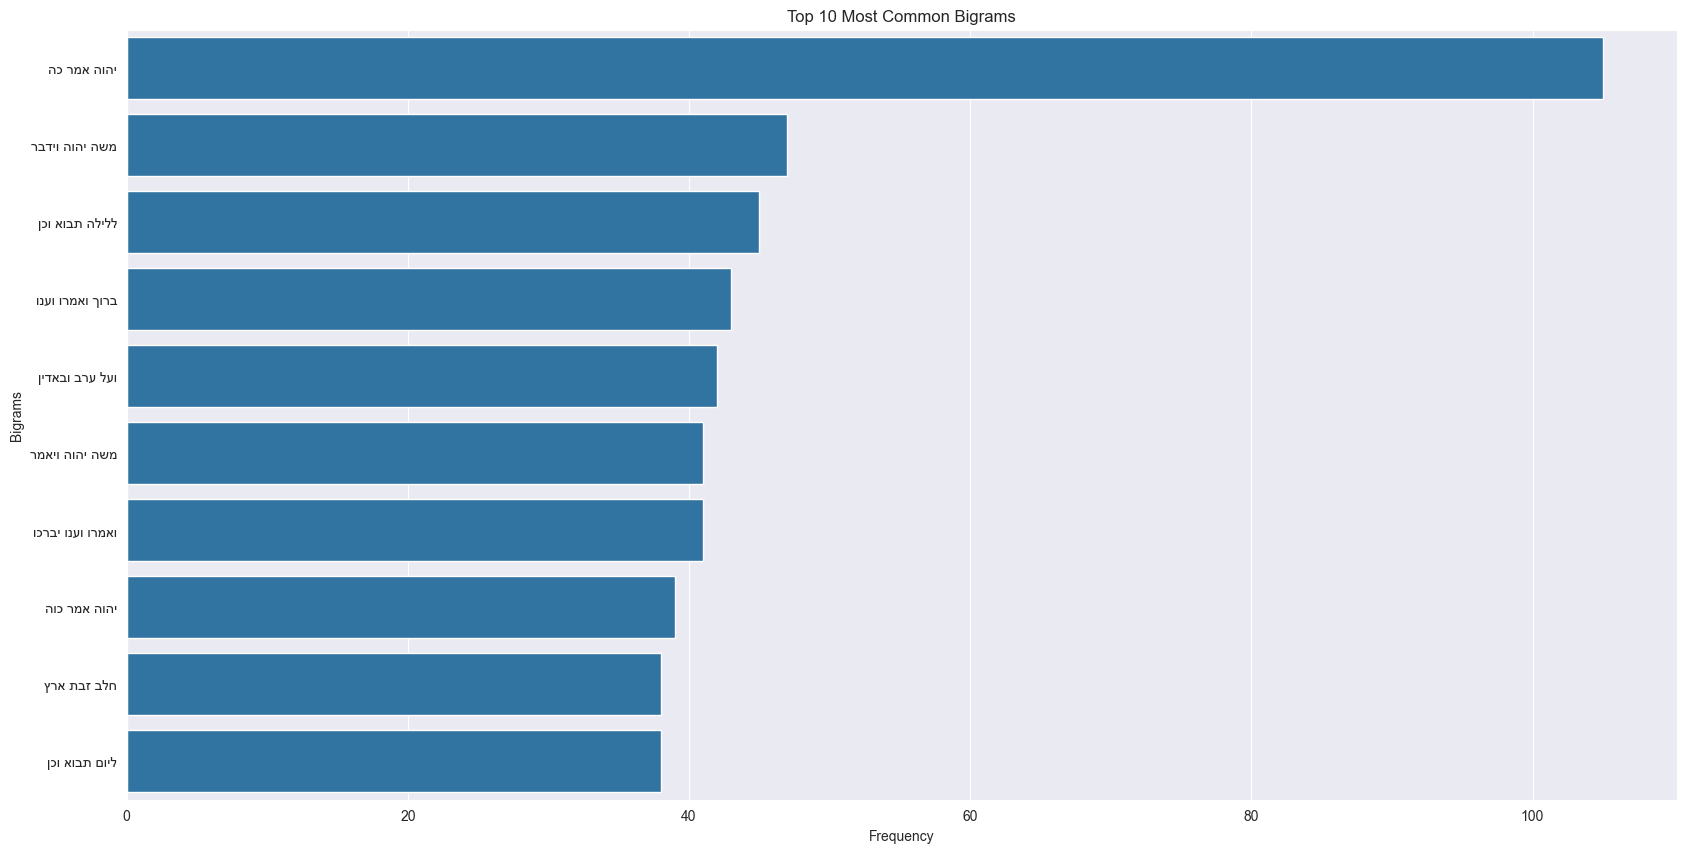

In [30]:
plot_ngram(corpus_no_punc_rev, 3,10)